In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm
%matplotlib inline

### Генерация выборки экспоненциального распределения 

In [2]:
lamb = 5 # параметр экспоненциального распределения 
exp_rv = expon(scale = 1./lamb)
ksi = exp_rv.rvs(1000)

#  Мат. ожидание и среднее квадратичное
mean = 1./lamb
var = 1./ lamb

print mean, var

0.2 0.2


### Гистограмма и теоретическая плотность

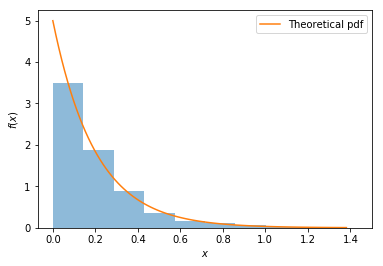

In [3]:
plt.hist(ksi, density=True, alpha = 0.5)

x = np.linspace(exp_rv.ppf(0.001), exp_rv.ppf(0.999), 100)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

### Оценка выборочного среднего

In [4]:
def builtGraph(n):
    ex = np.array([])
    for i in range(1000):
        ksi = exp_rv.rvs(n)
        ex = np.append(ex, sum(ksi)/n)
    plt.hist(ex,bins='auto',density=True,alpha = 0.5, label='Mean pdf')

    a = mean # 1-ый параметр номального распределения
    sigma = var/(n**(0.5)) # 2-ой параметр номального распределения
    print a, sigma

    x = np.linspace(norm(a, sigma).ppf(0.001), norm(a, sigma).ppf(0.999), 100)
    pdf = norm(a, sigma).pdf(x)
    plt.plot(x, pdf, label='Normal pdf')
    plt.legend()

    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.show()

0.2 0.0894427191


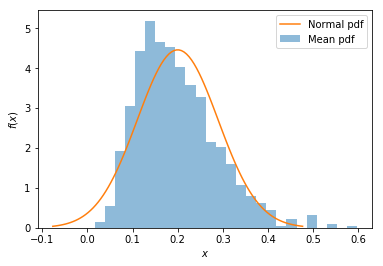

In [5]:
builtGraph(5) # объем выборки = 5

0.2 0.0632455532034


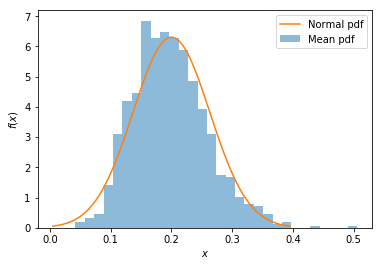

In [6]:
builtGraph(10) # объем выборки = 10

0.2 0.0282842712475


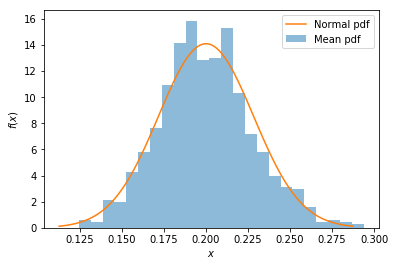

In [7]:
builtGraph(50) # объем выборки = 50

#### Вывод

Как видно из графиков, чем больше объем выборки, тем лучше апроксимация распределения. Значения n=5 и n=10 слишком малы для апроксимации, n=50 тоже не всегда достаточно. Чем больше n, тем выше точность.